In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
#https://github.com/fraunhoferhhi/BerlinV2X
sidelink='/data22/bde/Data/BerlinV2X/sidelink_dataframe.parquet'
cellular='/data22/bde/Data/BerlinV2X/cellular_dataframe.parquet'
df = pd.read_parquet(cellular)
#df.info(verbose=True)

In [3]:
DIRECTION_downlink = False
# "direction == 'downlink'
# "direction == 'uplink'
# measured_qos == 'datarate'
# measured_qos == 'delay'
# Filter only for downlink datarate measurements
filtered_data = df.query("direction == 'uplink' & measured_qos == 'delay'")

# Remove incomplete measurements without datarate
filtered_data = filtered_data.dropna(subset='ping_ms')

# Train and test split along operators
train_data = filtered_data.query("operator == 1")
train_data_1 = train_data.query("device == 'pc1'")
train_data_2 = train_data.query("device == 'pc2'")
train_data_3 = train_data.query("device == 'pc3'")
train_data_4 = train_data.query("device == 'pc4'")

test_data = filtered_data.query("operator == 2")
test_data_1 = test_data.query("device == 'pc1'")
test_data_2 = test_data.query("device == 'pc2'")
test_data_3 = test_data.query("device == 'pc3'")
test_data_4 = test_data.query("device == 'pc4'")

In [4]:
print(len(train_data_1))
print(len(train_data_2))
print(len(train_data_3))
print(len(train_data_4))

10633
0
0
10690


In [5]:
print(len(test_data_1))
print(len(test_data_2))
print(len(test_data_3))
print(len(test_data_4))

0
10155
10488
0


In [6]:
qos_column = 'datarate'

downlink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Downlink_Num_RBs',
     'PCell_Downlink_TB_Size',
     'PCell_Downlink_Average_MCS',
     'PCell_Downlink_frequency',
     'PCell_Downlink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'SCell_RSRP_max',
     'SCell_RSRQ_max',
     'SCell_RSSI_max',
     'SCell_SNR_1',
     'SCell_SNR_2',
     'SCell_Downlink_Num_RBs',
     'SCell_Downlink_TB_Size',
     'SCell_Downlink_Average_MCS',
     'SCell_Downlink_frequency',
     'SCell_Downlink_bandwidth_MHz',
     'SCell_Cell_Identity',
     'SCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

uplink_columns = [
     'ping_ms',
     'datarate',
     'PCell_RSRP_max',
     'PCell_RSRQ_max',
     'PCell_RSSI_max',
     'PCell_SNR_1',
     'PCell_SNR_2',
     'PCell_Uplink_Num_RBs',
     'PCell_Uplink_TB_Size',
     'PCell_Uplink_Tx_Power_(dBm)',
     'PCell_Uplink_frequency',
     'PCell_Uplink_bandwidth_MHz',
     'PCell_Cell_Identity',
     'PCell_freq_MHz',
     'Latitude',
     'Longitude',
     'Altitude',
     'speed_kmh',
     'COG',
     'precipIntensity',
     'precipProbability',
     'temperature',
     'apparentTemperature',
     'dewPoint',
     'humidity',
     'pressure',
     'windSpeed',
     'cloudCover',
     'uvIndex',
     'visibility',
     'Traffic Jam Factor']

print(f"The BERLINV2X uses {len(downlink_columns)} download features and {len(uplink_columns)} upload features")

The BERLINV2X uses 43 download features and 31 upload features


In [7]:
if DIRECTION_downlink:
    # Missing value imputation
    d_1 = train_data_1[downlink_columns].fillna(0)
    d_2 = train_data_4[downlink_columns].fillna(0)
    d_3 = test_data_2[downlink_columns].fillna(0)
    d_4 = test_data_3[downlink_columns].fillna(0)

    downlink = pd.concat([d_1, d_2, d_3, d_4])
    downlink['date'] = downlink.index.tz_localize(None)
    downlink['PCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['PCell_Downlink_bandwidth_MHz'])
    downlink['SCell_Downlink_bandwidth_MHz'] = pd.to_numeric(downlink['SCell_Downlink_bandwidth_MHz'])
    downlink.to_csv(f'data/BERLINV2X/berlin-downlink-delay.csv', encoding='utf-8', index=False)
    downlink.info()
    downlink.head()
    df = downlink

In [8]:
if not DIRECTION_downlink:
    u_1 = train_data_1[uplink_columns].fillna(0)
    u_2 = train_data_4[uplink_columns].fillna(0)
    u_3 = test_data_2[uplink_columns].fillna(0)
    u_4 = test_data_3[uplink_columns].fillna(0)

    uplink = pd.concat([u_1, u_2, u_3, u_4])
    uplink['date'] = uplink.index.tz_localize(None)
    uplink['PCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['PCell_Uplink_bandwidth_MHz'])
    #uplink['SCell_Uplink_bandwidth_MHz'] = pd.to_numeric(uplink['SCell_Uplink_bandwidth_MHz'])
    uplink.to_csv(f'data/BERLINV2X/berlin-uplink-delay.csv', encoding='utf-8', index=False)
    uplink.info()
    uplink.head()
    df = uplink

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41966 entries, 2021-06-23 13:50:38+02:00 to 2021-06-23 17:06:59+02:00
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ping_ms                      41966 non-null  float64       
 1   datarate                     41966 non-null  float64       
 2   PCell_RSRP_max               41966 non-null  float64       
 3   PCell_RSRQ_max               41966 non-null  float64       
 4   PCell_RSSI_max               41966 non-null  float64       
 5   PCell_SNR_1                  41966 non-null  float64       
 6   PCell_SNR_2                  41966 non-null  float64       
 7   PCell_Uplink_Num_RBs         41966 non-null  float64       
 8   PCell_Uplink_TB_Size         41966 non-null  float64       
 9   PCell_Uplink_Tx_Power_(dBm)  41966 non-null  float64       
 10  PCell_Uplink_frequency       41966 non-null  float64       

In [9]:
df.head()

,ping_ms,datarate,PCell_RSRP_max,PCell_RSRQ_max,PCell_RSSI_max,PCell_SNR_1,PCell_SNR_2,PCell_Uplink_Num_RBs,PCell_Uplink_TB_Size,PCell_Uplink_Tx_Power_(dBm),PCell_Uplink_frequency,PCell_Uplink_bandwidth_MHz,PCell_Cell_Identity,PCell_freq_MHz,Latitude,Longitude,Altitude,speed_kmh,COG,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,cloudCover,uvIndex,visibility,Traffic Jam Factor,date
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-06-23 13:50:38+02:00,45.9,394000.0,-76.019375,-8.418750,-47.821875,21.853,22.695,1979.0,95983.0,112.266667,19300.0,20,29127680.0,1800.0,52.515160,13.323137,36.0,14.4456,31.8,0.149,0.06,20.34,20.34,13.18,0.63,1019.1,2.66,0.97,4.0,16.093,3.03231,2021-06-23 13:50:38
2021-06-23 13:50:39+02:00,36.4,403000.0,-80.997500,-8.230625,-53.826875,17.447,17.529,1839.0,85834.0,111.777476,19300.0,20,29127680.0,1800.0,52.515192,13.323163,35.7,14.8160,28.6,0.149,0.06,20.34,20.34,13.18,0.63,1019.1,2.66,0.97,4.0,16.093,3.03231,2021-06-23 13:50:39
2021-06-23 13:50:40+02:00,38.0,394000.0,-81.863750,-8.200625,-52.843750,15.242,18.612,1855.0,87621.0,112.157534,19300.0,20,29127680.0,1800.0,52.515225,13.323192,35.5,15.7420,27.8,0.149,0.06,20.34,20.34,13.18,0.63,1019.1,2.66,0.97,4.0,16.093,3.03231,2021-06-23 13:50:40
2021-06-23 13:50:41+02:00,41.9,403000.0,-82.641875,-8.565625,-55.123125,16.034,16.266,1828.0,84610.0,111.747268,19300.0,20,29127680.0,1800.0,52.515257,13.323220,35.4,14.6308,27.3,0.149,0.06,20.34,20.34,13.18,0.63,1019.1,2.66,0.97,4.0,16.093,3.03231,2021-06-23 13:50:41
2021-06-23 13:50:42+02:00,36.0,394000.0,-80.836250,-8.865000,-52.646250,17.429,17.339,1769.0,82139.0,112.897260,19300.0,20,29127680.0,1800.0,52.515287,13.323248,35.5,14.2604,26.9,0.149,0.06,20.34,20.34,13.18,0.63,1019.1,2.66,0.97,4.0,16.093,3.03231,2021-06-23 13:50:42


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(1,3, figsize=(20, 6))
#sns.heatmap(df.corr('pearson'), ax=ax[0], annot=True)
#sns.heatmap(df.corr('spearman'), ax=ax[1], annot=True)
#sns.heatmap(df.corr('kendall'), ax=ax[2], annot=True)

In [11]:
def multi_corr(df, feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)
    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

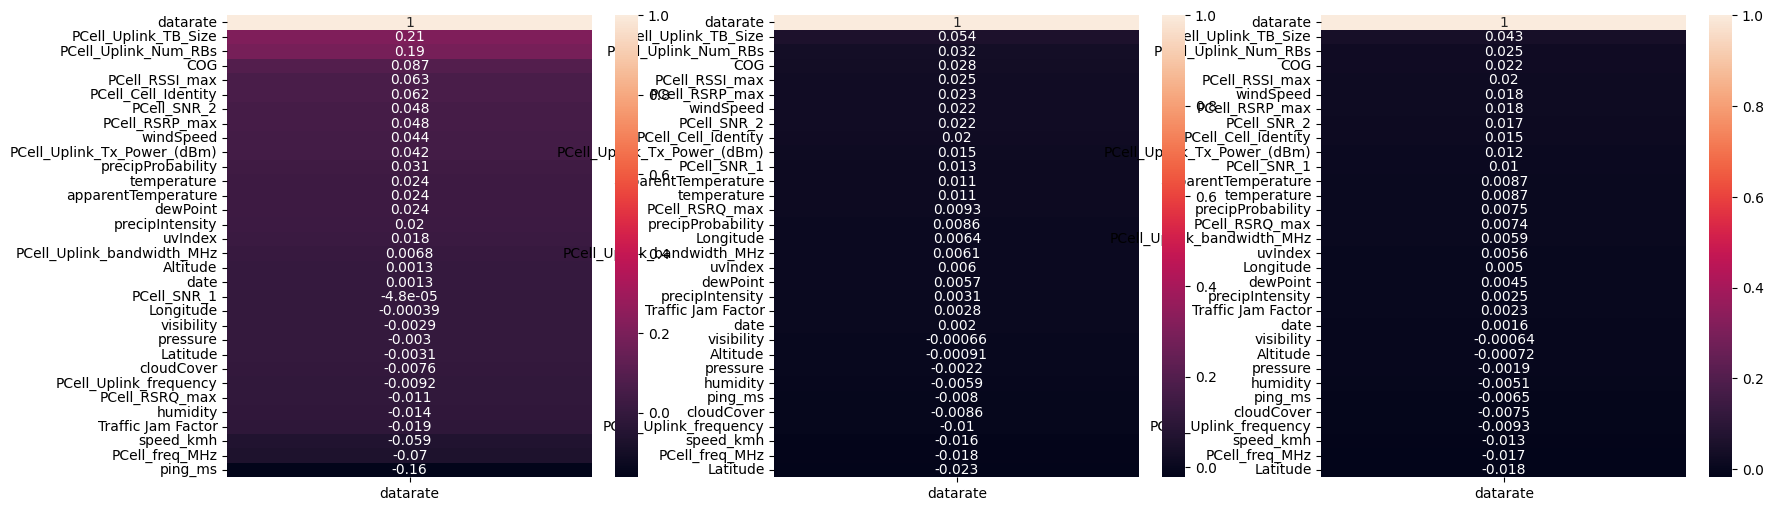

In [12]:
multi_corr(df, 'datarate')

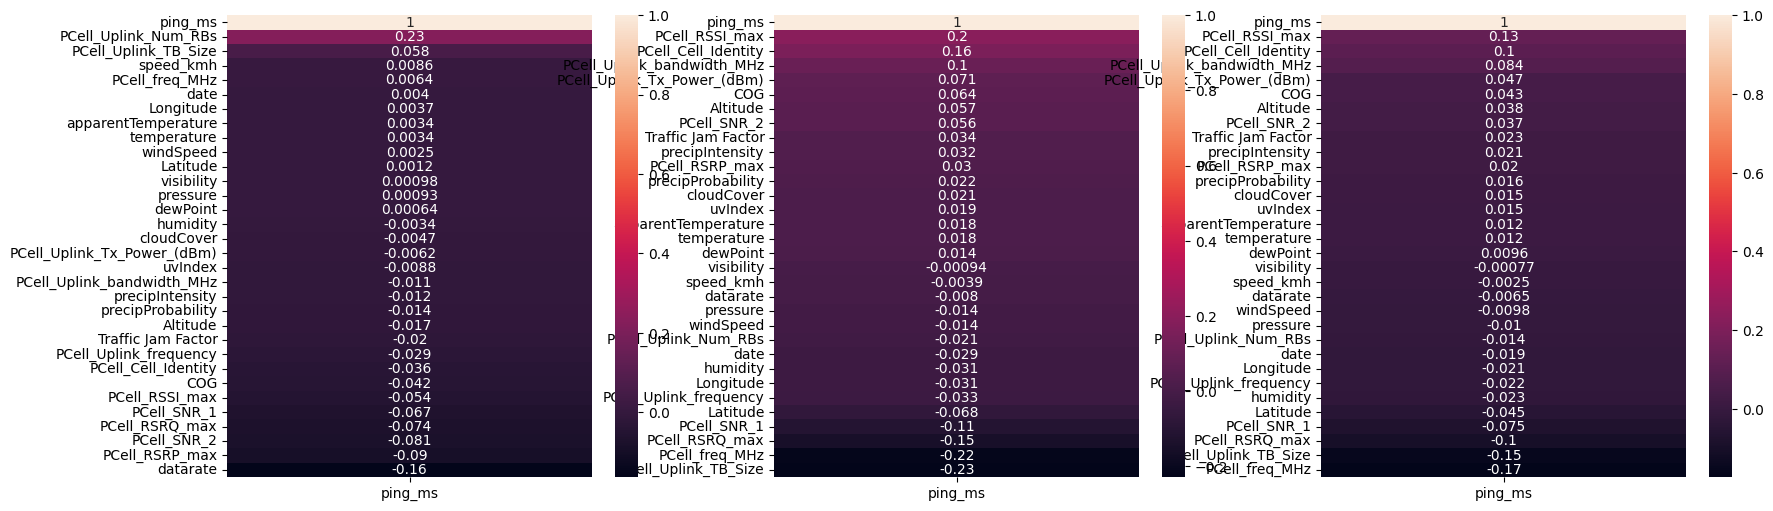

In [13]:
multi_corr(df, 'ping_ms')